# The bisection method: divide et impera

*(Jupyter notebook by Simone Brugiapaglia)*

In this notebook we study the bisection method for root finding.

See also Chapter 19 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 2.1 of 

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [102]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Implementation of the method

We start by defining a function that implements the bisection method to look for roots of a function $f : [a,b] \to \mathbb{R}$ using a stopping criterion based on the semi-interval size, controlled by the parameter `TOL` and on the maximum number of iterations `N_max`. The method produces a sequence of approximations $p_n$ to a root $p$, which is returned as an array by `bisection`. 

In [117]:
def bisection(f, a, b, TOL, N_max):
    """
    Approximates a root of a function f over the interval [a, b] via the bisection method
    using N_max maximum iterations and a tolerance criterion on the absolute
    error (based on the semi-size of the current interval) with parameter TOL (i.e., method
    stops when semisize is less than or equal to TOL).

    The function returns an array containing the sequence of approximations computed by the method.
    """

    # precompute f(a) and f(b) to save function evaluations
    fa = f(a)
    fb = f(b)

    # preliminary checks
    if fa * fb > 0: # f(a) and f(b) do not have opposite signs
        raise TypeError("Bisection cannot be applied: f(a) and f(b) do not have opposite signs")
    elif fa == 0: 
        return a # a is a root
    elif fb == 0: 
        return b # b is a root
        
    # inizialize iteration counter n and interval semisize
    n = 0
    semisize = (b - a) / 2
    p_array = np.array([], dtype=np.int64).reshape(0,1)
    
    while (n < N_max and semisize > TOL):
        n = n + 1        # increase iteration counter
        p = a + semisize # compute midpoint
        fp = f(p)        # evaluate f  at midpoint
        p_array = np.vstack((p_array, p)) # add current approximation to array
        
        if (fp == 0 or semisize < TOL): # root found
            return p_array 
        
        if fa * fp > 0: 
            a = p # choose right semi-interval
        else:           
            b = p # choose left semi-interval

        semisize = (b - a) / 2 # update interval semi-size

    # maximum number of iterations reached, but return the array of approximations anyways
    return p_array 

## Testing the method

We apply `bisection` to the function $f(x) = \cos(x)$ and the interval $[a,b] = [0,2]$. We already know that this function has only one root in $[a,b]$, given by $p=\pi/2$. 

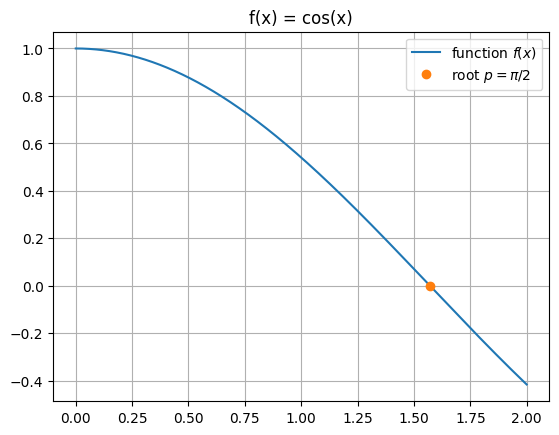

In [118]:
f = lambda x: np.cos(x)
x_grid = np.linspace(0,2,1000)
plt.plot(x_grid, f(x_grid), label = 'function $f(x)$')
plt.plot(math.pi/2, 0, 'o', label = 'root $p = \pi/2$')
plt.grid()
plt.title("f(x) = cos(x)")
plt.legend()
plt.show()

In numerical analysis, it is useful to test a method in cases were we already know the ground truth (in this case, the root $p = \pi/2$) so that we could measure the approximation error and the convergence of the method. This helps us check that our implementation is correct.

Let's apply `bisection` with `TOL = 1e-10` and `N_max = 100`.

In [131]:
# define algorithm's parameters
a = 0
b = 2
TOL = 1e-10
N_max = 100

# apply the bisection method
p_array = bisection(f, a, b, TOL , N_max) 

# print sequence of approximations
print(p_array)

[[1.        ]
 [1.5       ]
 [1.75      ]
 [1.625     ]
 [1.5625    ]
 [1.59375   ]
 [1.578125  ]
 [1.5703125 ]
 [1.57421875]
 [1.57226562]
 [1.57128906]
 [1.57080078]
 [1.57055664]
 [1.57067871]
 [1.57073975]
 [1.57077026]
 [1.57078552]
 [1.57079315]
 [1.57079697]
 [1.57079506]
 [1.57079601]
 [1.57079649]
 [1.57079625]
 [1.57079637]
 [1.57079631]
 [1.57079634]
 [1.57079633]
 [1.57079633]
 [1.57079633]
 [1.57079633]
 [1.57079633]
 [1.57079633]
 [1.57079633]
 [1.57079633]]


Note that `bisection` produced much less than `N_max` approximations. In fact, the array of approximations has size 34:

In [128]:
p_array.size # lenght of p_array

34

This means that `bisection` converged in 34 iterations and that, according to the stoping criterion, $|p_{34} - p| \leq \texttt{TOL} = 10^{-10}$. 

Let's check that this is the case:

In [129]:
print(abs(p_array[-1] - math.pi/2)) # Note that p_array[-1] extracts the last entry of p_array

[5.5644378e-11]


## Convergence of bisection

We now plot the absolute error of bisection $|p_n - p|$ as a function of the iteration number $n$. In particular, we can observe that the theoretical upper bound 
$$
|p_n -p| \leq \frac{b-a}{2^{n}}.
$$
This since the rate of convergence $O(2^{-n})$ is exponential in $n$, we use a `semilogy` plot.

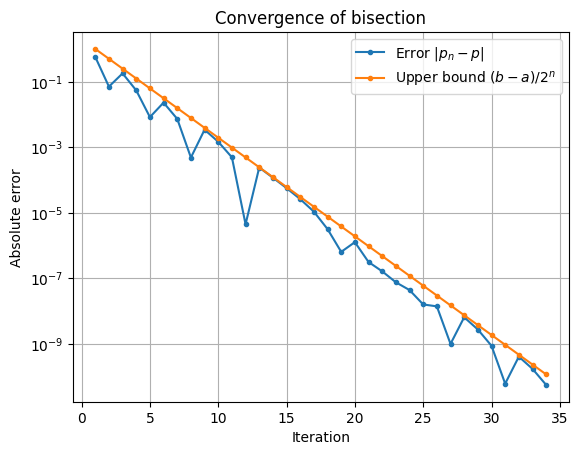

In [133]:
n_values = np.arange(p_array.size) + 1
n_values

plt.semilogy(n_values, np.abs(p_array - p), '.-', label = 'Error $|p_n - p|$')
plt.semilogy(n_values, (b-a) * 2.0**(-n_values), '.-', label = 'Upper bound $(b-a)/2^n$')
plt.xlabel("Iteration")
plt.ylabel("Absolute error")
plt.title("Convergence of bisection")
plt.legend()
plt.grid()
plt.show()

The error bound quite sharp in this case!

## Recommended problems

Test the `bisection` function for different functions $f$ and intervals $[a,b]$. 

Modify the `bisection` function in order to replace the stopping criterion based on the interval semisize with the following:

-  absolute increment: $|p_{n} - p_{n-1}| < \texttt{TOL}$
-  relative increment: $|p_{n} - p_{n-1}|/|p_n| < \texttt{TOL}$
-  absolute function value: $|f(p_n)| < \texttt{TOL}$

How does this affect the performance of the method?